In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
datasets = ['educacao_particular_coord.csv',
            'educacao_publica_coord.csv',
            'lazer_particular_coord.csv',
            'lazer_publico_coord.csv',
            'saude_particular_coord.csv',
            'saude_publica_coord.csv',
            'seguranca_patrimonio_coord.csv',
            'seguranca_vida_coord.csv', 
            'transporte_ciclovias_coord.csv',
            'transporte_onibus_coord.csv',
            'zoneamento_comercio_coord.csv',
            'zoneamento_industria_coord.csv']

In [63]:
def plotarGraficoCoordenadas(df , c):
    X = np.array(df)
    m = folium.Map(location=[df.LATITUDE.mean(), df.LONGITUDE.mean()], zoom_start=13, 
                   tiles='OpenStreet Map')
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=[row.LATITUDE, row.LONGITUDE],
            radius=3,
            color=c,
            fill=True,
            fill_colour=c
        ).add_to(m)
    return m

def plotarGraficoCoordenadas(df1, c1 , df2, c2 , r , op):
    X = np.array(df1)
    m = folium.Map(location=[df1.LATITUDE.mean(), df1.LONGITUDE.mean()], zoom_start=13, 
                   tiles='OpenStreet Map')
    for _, row in df1.iterrows():
        folium.CircleMarker(
            location=[row.LATITUDE, row.LONGITUDE],
            radius=row.QUANTIDADE /50,
            color=c1,
            fill=True,
            fill_color=c1,
            fill_opacity=op,
            opacity=op
        ).add_to(m)
    for _, row in df2.iterrows():
        folium.CircleMarker(
            location=[row.LATITUDE, row.LONGITUDE],
            radius=row.QUANTIDADE / 50,
            color=c2,
            fill=True,
            fill_color=c2,
            fill_opacity=op,
            opacity=op
        ).add_to(m)
    return m
    
def plotarGraficoClusters(df , c):
    X = np.array(df)
    m = folium.Map(location=[df.LATITUDE.mean(), df.LONGITUDE.mean()], zoom_start=13, 
                   tiles='OpenStreet Map')
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=[row.LATITUDE, row.LONGITUDE],
            radius=row.QUANTIDADE,
            color=c,
            fill=True,
            fill_colour=c
        ).add_to(m)
    display(m)
    
def dbscan(df, eps, min_samples):
    X = np.array(df)
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    return db

def obterClusters(df , eps, min_samples):
    X = np.array(df)
    db = dbscan(X , eps , min_samples)
    labels = db.labels_
    no_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print("numero de clusters = " + str(no_clusters))
    labels = np.array(labels)
    labels = pd.DataFrame(labels)
    df['LABELS'] = labels
    df = df.groupby(
         ['LABELS']
     ).agg(
         LATITUDE = ('LATITUDE','mean'),
         LONGITUDE = ('LONGITUDE','mean'),
         QUANTIDADE = ('LABELS','count')
     ).reset_index()
    return df

def minMax(dados , coluna):
    df_min_max_scaled = dados.copy()
    df_min_max_scaled[coluna] = (df_min_max_scaled[coluna] - df_min_max_scaled[coluna].min()) / (df_min_max_scaled[coluna].max() - df_min_max_scaled[coluna].min()) 
    dados[coluna] =  df_min_max_scaled[coluna]*100;
    return dados;

In [68]:
df1 = pd.read_csv(datasets[10] , sep =";", decimal =",", encoding = "UTF-8")
df2 = pd.read_csv(datasets[11] , sep =";", decimal =",", encoding = "UTF-8")
m = plotarGraficoCoordenadas(df1 , '#0057E9' , df2 , '#F2CA19' , 5 , .7 )
display(m)
m.save('zoneamento.html')

#3e3d53
#D54799 roxo
#F2CA19 amarelo
#FF00BD rosa
#0057E9 azul
#87E911 verde
#E11845 vermelho


#df_clusters = minMax(df, 'QUANTIDADE')
#plotarGraficoClusters(df , 'blue')

numero de clusters = 8


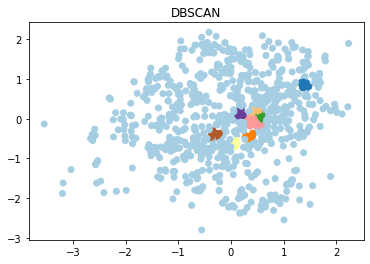

In [61]:
df = pd.read_csv("educacao_particular_coord.csv" , sep =";", decimal =",", encoding = "UTF-8")
df = obterClusters(df , 0.1, 10)

In [67]:
def obterValoresCaracteristica(nomePlanilha , eps , min_samples):
    DISTANCIA_MAXIMA = 0.3891
    df = pd.read_csv(nomePlanilha , sep =";", decimal =",", encoding = "UTF-8")
    df_clusters = obterClusters(df , eps, min_samples)
    df_clusters.drop('LABELS', axis=1, inplace=True)
    CLUSTERS = np.array(df_clusters)
    df_bairros = pd.read_csv("bairros_coord.csv" , sep =";", decimal =",", encoding = "UTF-8")
    df_bairros.drop('NOME DO BAIRRO', axis=1, inplace=True)
    BAIRROS = np.array(df_bairros)
    val = []
    for b in BAIRROS:#coordenadas dos centroides dos bairros
        f = 0#somatorio do valor da caracteristica
        for c in CLUSTERS:
            p = np.array([c[0] , c[1]])#coordenadas do centroide do cluster
            dist =  1 - (np.linalg.norm(b-p) / DISTANCIA_MAXIMA)
            f += dist * c[2]
        val.append(f)
    return pd.DataFrame(data = val)

0.38910152916687013
